# Importing Libaries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.metrics import r2_score


# Read and prepare Data

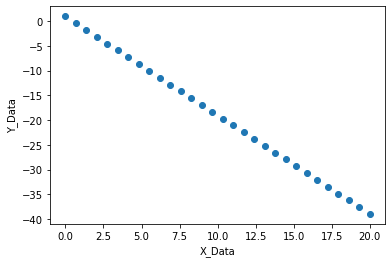

In [11]:
X_Data = np.linspace(0 , 20 , 30)
Y_Data = -2*X_Data +1
X_Data , Y_Data = sk.utils.shuffle(X_Data , Y_Data)
plt.scatter(X_Data , Y_Data)
plt.xlabel("X_Data")
plt.ylabel("Y_Data")
plt.show()

In [12]:
feture = np.concatenate((np.ones(len(X_Data)).reshape( len(X_Data), 1) 
                         , X_Data.reshape(len(X_Data) , 1))  , axis = 1)


# Stochastic GD

In [13]:
theta = np.array([0 , 0 ])
Y= np.dot(theta ,feture.T)
alpha = 0.0001
Data_length = len(X_Data)
Epoch = 100

Jtheta = []
theta_zero = []
theta_one = []
Max_no_iter = 10
Not_first_iter = 0
for j in range(Max_no_iter):
#     if (Not_first_iter >1 and np.abs(Jtheta[-1]-Jtheta[-2]) > 0.1):
#         break
    Not_first_iter +=1
    theta_zero.append(theta[0])
    theta_one.append(theta[1])
    for i in range(Data_length):
        Y= np.dot(theta ,feture[i].T)
        if i == Data_length-1:
            Jtheta.append((alpha/2)*(np.sum(np.square(np.dot( (Y-Y_Data[i]) , feture[i])) ,axis = 0)))
        theta = theta - alpha*(np.sum(np.dot( (Y-Y_Data[i]) , feture[i]) ,axis = 0))
        
print(theta)  

[-1.77717381 -1.77717381]


# Data Score

In [14]:
Y= np.dot(theta ,feture.T)
print(r2_score(Y , Y_Data))

0.9816019346884757


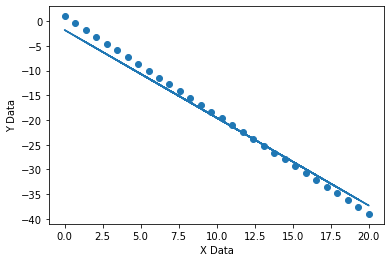

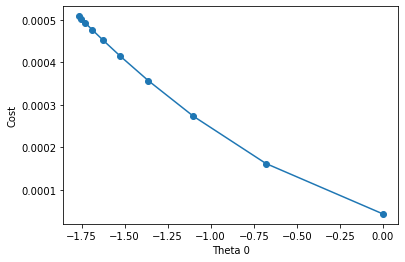

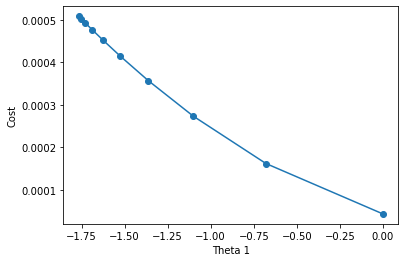

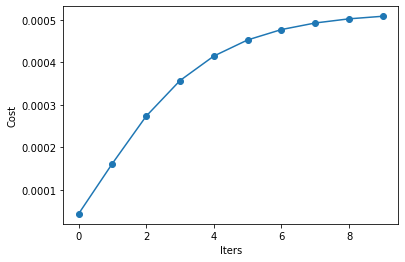

In [15]:
plt.scatter(X_Data , Y_Data)
plt.plot(X_Data, theta[0]+ X_Data * theta[1]) 
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.show()

plt.plot(theta_zero ,Jtheta ,'-o') 
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_one , Jtheta , '-o')
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()


plt.plot(np.arange(Max_no_iter) , Jtheta , '-o')
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()

# Generate Batches

In [16]:
def Generate_Batches(Data  , batch_size):
    Batches = []
    M = 0
    while(M+batch_size <= len(Data)):
        Batches.append(Data[M : M+batch_size])
        M +=batch_size-1
    Batches.append(Data[M : ]) 
    return Batches

# Mini-Batch GD

In [17]:
theta = np.array([0 , 0 ])
Y= np.dot(theta ,feture.T)
alpha = 0.0001
Data_length = len(X_Data)
Epoch = 100

Jtheta = []
theta_zero = []
theta_one = []
Max_no_iter = 400
Batch_Size = 3
feture_Mini = Generate_Batches(feture , Batch_Size)
Y_mini = Generate_Batches(Y_Data , Batch_Size)
for j in range(Max_no_iter):
    for i in range(len(feture_Mini)):
        Y= np.dot(theta ,feture_Mini[i].T)
        Jtheta.append((alpha/2*len(feture_Mini))*(np.sum(np.square(np.dot( (Y-Y_mini[i]) , feture_Mini[i])) ,axis = 0)))
        theta = theta - (alpha/len(feture_Mini))*(np.sum(np.dot( (Y-Y_mini[i]) , feture_Mini[i]) ,axis = 0))
        theta_zero.append(theta[0])
        theta_one.append(theta[1])
print(theta)   

[-1.78279908 -1.78279908]


# Data Score

In [18]:
Y= np.dot(theta ,feture.T)
print(r2_score(Y , Y_Data))

0.981863011059151


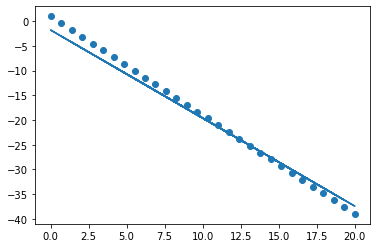

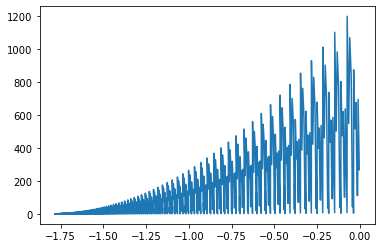

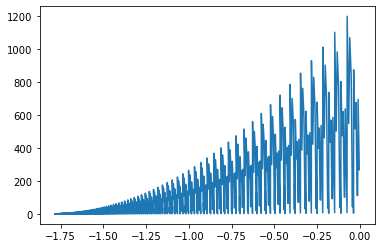

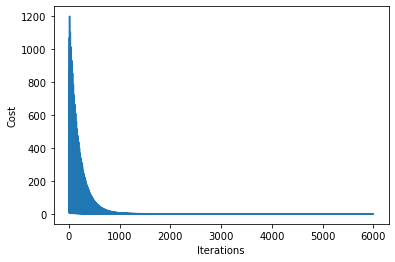

In [19]:
plt.scatter(X_Data , Y_Data)
plt.plot(X_Data, theta[0]+ X_Data * theta[1]) 
plt.show()

plt.plot(theta_zero ,Jtheta ) 
plt.show()

plt.plot(theta_one , Jtheta ) 
plt.show()

plt.xlabel("Iterations" )
plt.ylabel("Cost")
plt.plot(np.arange(Max_no_iter*len(feture_Mini)) , Jtheta ) 
plt.show()

# MultiVariate Data

# Read and Explore Data

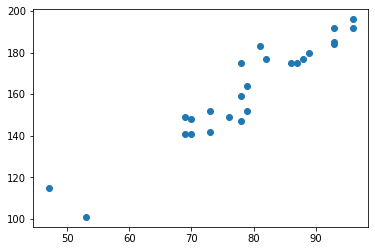

In [20]:
Data_points = np.genfromtxt("MultipleLR.csv" ,  delimiter= ',')
X_Data = Data_points[:,0:3]
Y_Data = Data_points[:,3]
X_Data , Y_Data = sk.utils.shuffle(X_Data , Y_Data)
plt.scatter(X_Data[:,0] , Y_Data)
plt.show()

# MultiVariate Algorithm

In [21]:
feture = np.concatenate((np.ones(len(X_Data)).reshape( len(X_Data), 1) 
                         , X_Data.reshape(len(X_Data) , 3))  , axis = 1)
theta = np.array([0 , 0 ,0 , 0])
Y= np.dot(theta ,feture.T)
alpha = 0.00001
Data_length = len(X_Data)
Epoch = 100

Jtheta = []
for i in range(Epoch):
    Y= np.dot(theta ,feture.T)
    Jtheta.append((alpha/2)*(np.sum(np.square(np.dot( (Y-Y_Data) , feture)) ,axis = 0)/Data_length))
    theta = theta - alpha*(np.sum(np.dot( (Y-Y_Data) , feture) ,axis = 0)/Data_length)
print(theta)    

[0.67248296 0.67248296 0.67248296 0.67248296]


# Data Score

In [22]:
Y= np.dot(theta ,feture.T)
print(r2_score(Y , Y_Data))

0.9773498200054909


# Batch Momentum based

In [23]:
theta = np.array([0 , 0 ,0 , 0])
Y= np.dot(theta ,feture.T)
alpha = 0.00001
Data_length = len(X_Data)
Epoch = 100

Gamma = 0.9
Vt = 0
Theta_Tmp = 0
for i in range(Epoch):
    Y= np.dot(theta ,feture.T)
    Theta_Tmp = theta - Gamma*Vt
    theta = theta - alpha*(np.sum(np.dot( (Y-Y_Data) , feture) ,axis = 0)/Data_length)
    Vt = Gamma*Vt + alpha*(np.sum(np.dot( (Y-Y_Data) , feture) ,axis = 0)/Data_length)
    
print(theta)   



[0.67248296 0.67248296 0.67248296 0.67248296]


# Data Score

In [24]:
Y= np.dot(theta ,feture.T)
print(r2_score(Y , Y_Data))

0.9773498200054909
